In [1]:
import sys, os
sys.path.append('..')
import numpy as np
import pandas as pd
from logging import error, warning
from gsw.GSWriter import GSWriter
from constants import CONSTANTS as CONST
import matplotlib.pyplot as plt
from map_vis_lanelet2 import draw_lanelet_map, set_visible_area
import lanelet2

# Trajectory Plotter
## Task breakdown
- read the generated trajectories from GeoScenario
- Plot it

## From GeoScenario


In [2]:
lanelet_map_file = '/home/jinwei/workspace/geoscenarioserver/scenarios/maps/interaction_maps/DR_DEU_Merging_MT_EXT.osm'
workspace_dir = os.path.dirname(os.getcwd())
traj_log_dir = os.path.join(os.path.join(workspace_dir, 'eval'), 'trajlog')

get all subfolders directories

In [3]:
scenario_file_name_list = [file for file in os.listdir(traj_log_dir) if file.endswith(".csv")]

scenario_log_dir_dict = {}
for scenario_file_name in scenario_file_name_list:
    scenario_log_dir_dict[scenario_file_name] = os.path.join(traj_log_dir, scenario_file_name)

In [4]:
def read_vehicles_state(scenario_log_dir):
    # get all the file name in the directory
    file_names = [file for file in os.listdir(scenario_log_dir) if file.endswith(".csv")]
    # initialize vehicle state as dictionary
    vehicle_state = {}

    # read the files
    for file_name in file_names:
        vehicle_state_df = pd.read_csv(os.path.join(scenario_log_dir, file_name))
        vehicle_id = np.unique(vehicle_state_df['id'].values)[0]
        x = vehicle_state_df['x'].values
        y = vehicle_state_df['y'].values
        vehicle_state[vehicle_id] = [x, y]
    return vehicle_state

In [5]:
def plot_lanelet_map(lanelet_map_file_dir):
    lat_origin = 0.0
    lon_origin = 0.0
    projector = lanelet2.projection.UtmProjector(lanelet2.io.Origin(lat_origin, lon_origin))
    laneletmap = lanelet2.io.load(lanelet_map_file_dir, projector)
    fig, axes = plt.subplots(1,1)
    # set the axis limits
    axes.set_xlim([850, 1015])
    axes.set_ylim([990, 1040])
    # axes.set_aspect('equal', adjustable='box')
    axes = draw_lanelet_map(laneletmap, axes)
    return axes

In [6]:
def fde(x1_arr, y1_arr, x2_arr, y2_arr):
    assert len(x1_arr)==len(y1_arr) and len(x2_arr)==len(y2_arr)
    return np.linalg.norm([(y1_arr[-1] - y2_arr[-1]), (x1_arr[-1] - x2_arr[-1])])

## plot the complete scenarios

ALL SDV

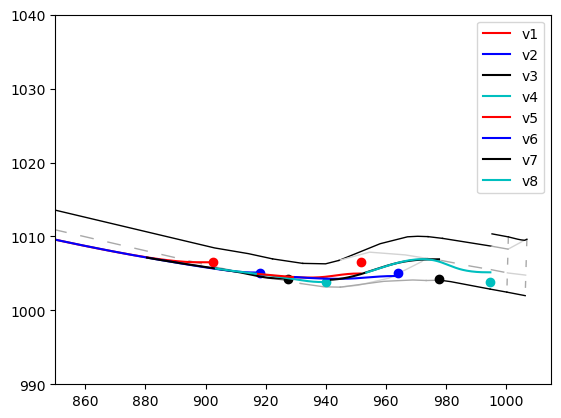

In [7]:
vehicle_state = read_vehicles_state(traj_log_dir)
plot_lanelet_map(lanelet_map_file)
plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')
plt.plot(vehicle_state[5][0], vehicle_state[5][1], 'r', label='v5')
plt.plot(vehicle_state[5][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[6][0], vehicle_state[6][1], 'b', label='v6')
plt.plot(vehicle_state[6][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[7][0], vehicle_state[7][1], 'k', label='v7')
plt.plot(vehicle_state[7][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[8][0], vehicle_state[8][1], 'c', label='v8')
plt.plot(vehicle_state[8][0][0], vehicle_state[4][1][0], 'co')
plt.legend()

ALL TV

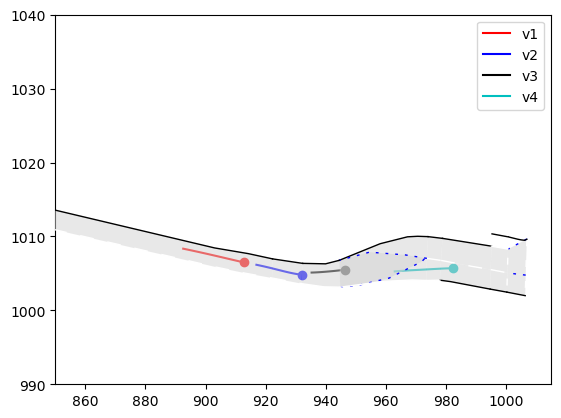

In [47]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['all_tv'])
plot_lanelet_map(lanelet_map_file)
plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')
plt.legend()

1 TV, 2 SDV, 3 TV, 4 TV

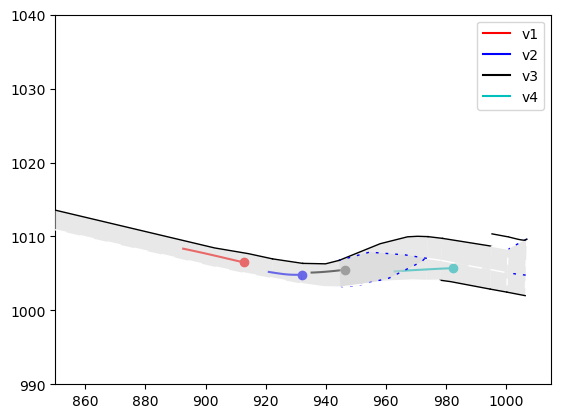

In [48]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['2sdv'])
plot_lanelet_map(lanelet_map_file)
plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')
plt.legend()

1 TV, 2 TV, 3 SDV, 4 TV

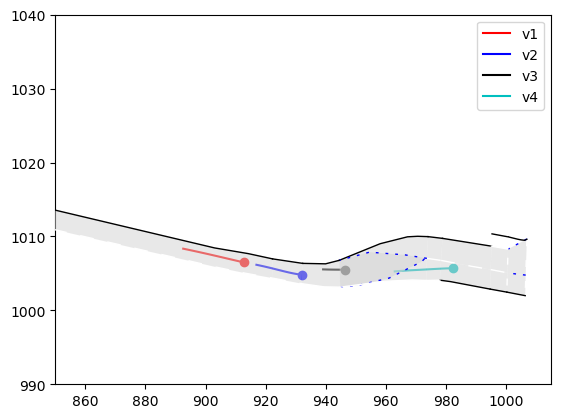

In [49]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['3sdv'])
plot_lanelet_map(lanelet_map_file)
plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')
plt.legend()

1 TV, 2 TV, 3 TV, 4 SDV

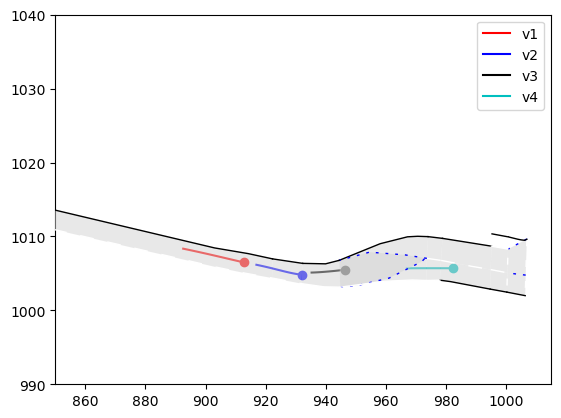

In [50]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['4sdv'])
plot_lanelet_map(lanelet_map_file)
plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')
plt.legend()

 ## Compare how different the planner work from the reality

2 SDV vs TV:

4.226789871038299


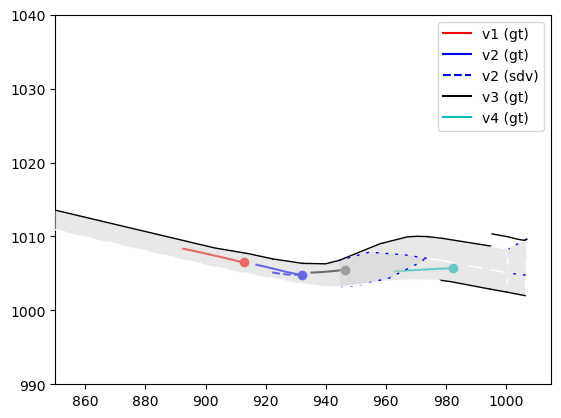

In [80]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['all_tv'])
plot_lanelet_map(lanelet_map_file)
handle1, = plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1 (gt)')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
handle2, = plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2 (gt)')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
handle3, = plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3 (gt)')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
handle4, = plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4 (gt)')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')

gt_x, gt_y = vehicle_state[2][0], vehicle_state[2][1]
vehicle_state = read_vehicles_state(scenario_log_dir_dict['2sdv'])
handle5, = plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b--', label='v2 (sdv)')
plt.legend(handles=[handle1, handle2, handle5, handle3, handle4])
print(fde(vehicle_state[2][0], vehicle_state[2][1], gt_x, gt_y))

3 SDV vs TV:

3.85951768567773


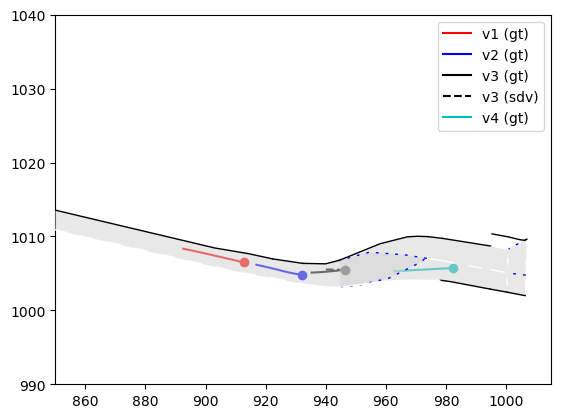

In [81]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['all_tv'])
plot_lanelet_map(lanelet_map_file)
handle1, = plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1 (gt)')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
handle2, = plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2 (gt)')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
handle3, = plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3 (gt)')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
handle4, = plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'c', label='v4 (gt)')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'co')

gt_x, gt_y = vehicle_state[3][0], vehicle_state[3][1]

vehicle_state = read_vehicles_state(scenario_log_dir_dict['3sdv'])
handle5, = plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k--', label='v3 (sdv)')
plt.legend(handles=[handle1, handle2, handle3, handle5, handle4])
print(fde(vehicle_state[3][0], vehicle_state[3][1], gt_x, gt_y))

4 SDV vs TV:

4.032515578132823


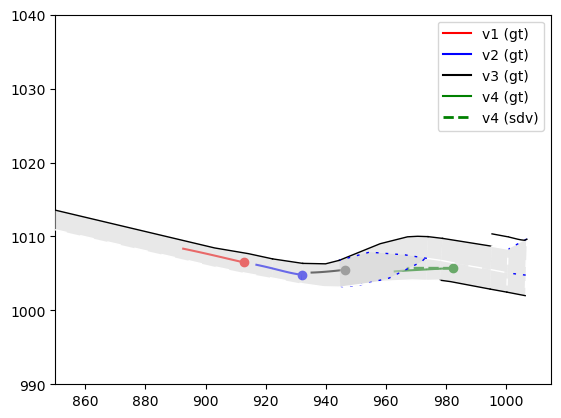

In [82]:
vehicle_state = read_vehicles_state(scenario_log_dir_dict['all_tv'])
plot_lanelet_map(lanelet_map_file)
handle1, = plt.plot(vehicle_state[1][0], vehicle_state[1][1], 'r', label='v1 (gt)')
plt.plot(vehicle_state[1][0][0], vehicle_state[1][1][0], 'ro')
handle2, = plt.plot(vehicle_state[2][0], vehicle_state[2][1], 'b', label='v2 (gt)')
plt.plot(vehicle_state[2][0][0], vehicle_state[2][1][0], 'bo')
handle3, = plt.plot(vehicle_state[3][0], vehicle_state[3][1], 'k', label='v3 (gt)')
plt.plot(vehicle_state[3][0][0], vehicle_state[3][1][0], 'ko')
handle4, = plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'g', label='v4 (gt)')
plt.plot(vehicle_state[4][0][0], vehicle_state[4][1][0], 'go')

gt_x, gt_y = vehicle_state[4][0], vehicle_state[4][1]

vehicle_state = read_vehicles_state(scenario_log_dir_dict['4sdv'])
handle5, = plt.plot(vehicle_state[4][0], vehicle_state[4][1], 'g--', linewidth=2, label='v4 (sdv)')
plt.legend(handles=[handle1, handle2, handle3, handle4, handle5])
print(fde(vehicle_state[4][0], vehicle_state[4][1], gt_x, gt_y))

## From CSV

In [35]:
lanelet_map_file = '/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/maps/DR_DEU_Merging_MT.osm'
dataset_csv = '/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/val/DR_DEU_Merging_MT_val.csv'
case_num = 114

# lanelet_map_file = '/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/maps/DR_USA_Intersection_GL.osm'
# dataset_csv = '/mnt/Data/Research_Dataset/interaction_dataset/INTERACTION-Dataset-DR-multi-v1_2/val/DR_USA_Intersection_GL_val.csv'
# case_num = 629

In [36]:
def plot_trajectories(ax, csv_dir, case_id):
    
    df = pd.read_csv(csv_dir)
    case_df = df.loc[df['case_id'] == case_id]
    track_id_list = case_df['track_id'].unique()
    
    ax_handle_list = []
    ax_acc_list = []
    for track_id in track_id_list:
        track_df = case_df.loc[case_df['track_id'] == track_id]
        x_arr = track_df["x"].values
        y_arr = track_df["y"].values
        vx_arr = track_df["vx"].values
        vy_arr = track_df["vy"].values
        v_arr = np.sqrt(np.array(vx_arr)**2 + np.array(vy_arr)**2)
        a_arr = np.diff(v_arr)
        t_arr = track_df['timestamp_ms'].values[0:-1]

        handle, = ax.plot(x_arr, y_arr, label='track '+ str(track_id))
        ax_handle_list.append(handle,)
        if max(track_df['timestamp_ms']) == 4000:
            ax.plot(x_arr[-1], y_arr[-1], 'ko')
        
    ax.legend(handles=ax_handle_list)
    ax.set_title("Visualization of case "+str(case_num)+" in "+"DR_USA_Intersection_GL")
    

    
def plot_velocities(csv_dir, case_id):
    
    df = pd.read_csv(csv_dir)
    case_df = df.loc[df['case_id'] == case_id]
    track_id_list = case_df['track_id'].unique()
    
    ax_acc_list = []
    ax_vel_list = []
    
    plt.figure(figsize=(8, 12), dpi=80)

    
    for track_id in track_id_list:
        track_df = case_df.loc[case_df['track_id'] == track_id]
        x_arr = track_df["x"].values
        y_arr = track_df["y"].values
        vx_arr = track_df["vx"].values
        vy_arr = track_df["vy"].values
        v_arr = np.sqrt(np.array(vx_arr)**2 + np.array(vy_arr)**2)
        a_arr = np.diff(v_arr)
        t_arr = track_df['timestamp_ms'].values[0:-1]
        plt.subplot(2,1,1)
        handle, = plt.plot(t_arr, a_arr, label='track '+ str(track_id))
        ax_acc_list.append(handle,)
        plt.subplot(2,1,2)
        handle, = plt.plot(track_df['timestamp_ms'].values, v_arr, label='track '+ str(track_id))
        ax_vel_list.append(handle,)
    
    plt.subplot(2,1,1)    
    plt.legend(handles=ax_acc_list)
    plt.xlabel("Time stamp in ms")
    plt.ylabel("Acceleration in m/s²")
    plt.title("Accleration profile of case "+str(case_num)+" in "+"DR_USA_Intersection_GL")

    plt.subplot(2,1,2)    
    plt.legend(handles=ax_vel_list)
    plt.xlabel("Time stamp in ms")
    plt.ylabel("Speed in m/s²")
    plt.title("Speed profile of case "+str(case_num)+" in "+"DR_USA_Intersection_GL")

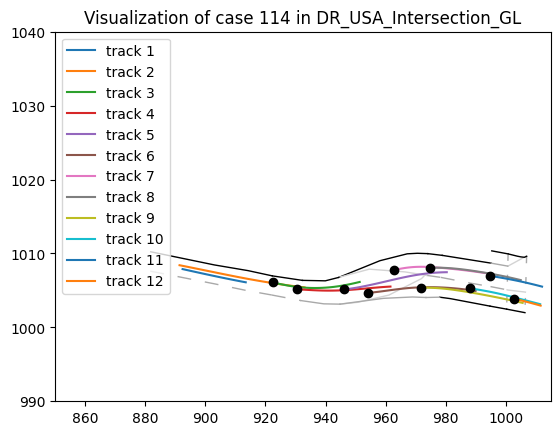

In [37]:
ax = plot_lanelet_map(lanelet_map_file)
plot_trajectories(ax, dataset_csv, case_num)

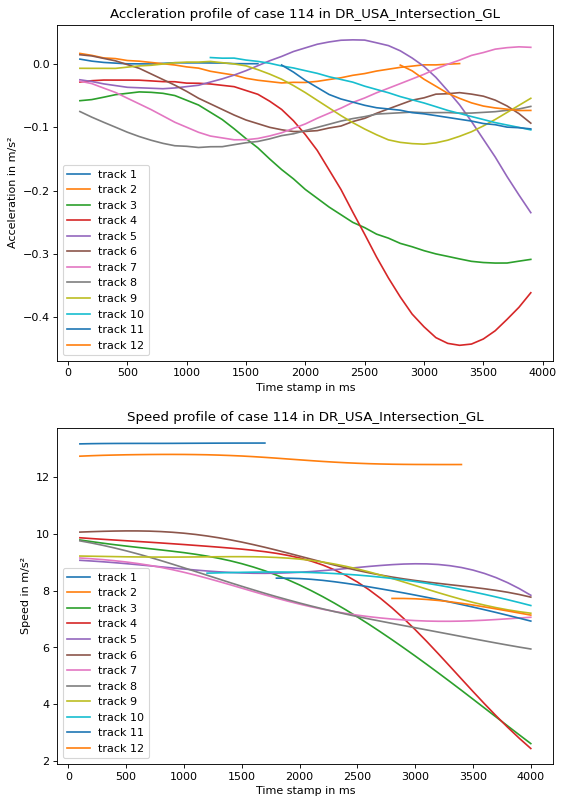

In [38]:
plot_velocities(dataset_csv, case_num)